### 01.04.2025 Lecture 3
# Clustering
*Documentation for sklearn:* https://scikit-learn.org/stable/modules/generated/sklearn.cluster.AgglomerativeClustering.html

<function matplotlib.pyplot.show(close=None, block=None)>

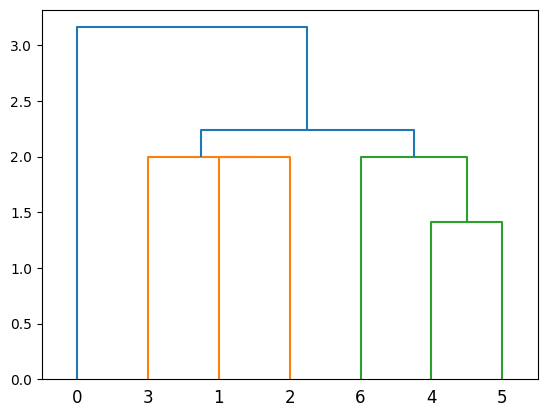

In [1]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster import hierarchy
from scipy.cluster.hierarchy import dendrogram
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

X = np.array([[ 3,  2],  [4, 5], [ 4,  7],  [2, 7], [ 6,  6],  [7, 7], [6, 4]]) # 7 samples, 2 features

clustering = AgglomerativeClustering(n_clusters=None, metric='euclidean', memory=None, connectivity=None, compute_full_tree='auto', linkage='single',
                                     distance_threshold=0, compute_distances=True).fit(X)

clustering
AgglomerativeClustering()
clustering.n_clusters_
clustering.labels_
clustering.n_connected_components_
clustering.n_features_in_
clustering.children_
clustering.distances_

z=hierarchy.linkage(X,'single')
hierarchy.dendrogram(z)
plt.show

## Example of using PuLP

In [1]:
from pulp import LpProblem, LpVariable, LpMaximize, LpStatus

#Initalize the LP
prob=LpProblem("Problem_1", LpMaximize)

#Decision Variables
x=LpVariable.dicts("x", [1,2], lowBound=0, cat="Continuous")

#Objective Function
prob +=10*x[1]+20*x[2]

#Constraints
prob +=-x[1]+2*x[2]<=15
prob +=x[1]+x[2]<=12
prob +=5*x[1]+3*x[2]<=45

print(prob)

#Solve Problem
status=prob.solve()
print(LpStatus[status])

#Display Objective Value
print()

#Display Variables
for var in prob.variables():
    print(f"{var.name}={var.varValue}")

print(f"OBJECTIVE VALUE: {prob.objective.value()}")



Problem_1:
MAXIMIZE
10*x_1 + 20*x_2 + 0
SUBJECT TO
_C1: - x_1 + 2 x_2 <= 15

_C2: x_1 + x_2 <= 12

_C3: 5 x_1 + 3 x_2 <= 45

VARIABLES
x_1 Continuous
x_2 Continuous

Optimal

x_1=3.0
x_2=9.0
OBJECTIVE VALUE: 210.0


## LP-DEA.py

In [3]:
import pandas as pd
import numpy as np
from pulp import LpMinimize

# data=pd.read_excel(r'''\Users\spapadokonstantakis\OneDrive - TU Wien\Work\Lehre\Data Science_Gren Chem_Eng\DEA-example.xlsx''', sheet_name=4, header=None)
# print(data)
# par=data.iloc[0:7, 0:5]
# print(par)
# parA=np.matrix(par)
# print(parA)

#Initalize the LP
prob=LpProblem("DEA_SOLVENTS", LpMinimize)

#Decision Variables
lamda=LpVariable.dicts("lamda", [1,2,3,4,5,6,7], lowBound=0, cat="Continuous")
slack=LpVariable.dicts("slack", [1,2,3,4,5], lowBound=0, cat="Continuous")
z=LpVariable.dicts("eff", [1], lowBound=None, cat="Continuous")

#Objective Function
prob +=z[1]

#Constraints
prob +=lamda[1]*0.57+lamda[2]*1.32+lamda[3]*0.77+lamda[4]*1.18+lamda[5]*0.94+lamda[6]*1.08+lamda[7]*1.8+slack[1]==z[1]*0.94
prob +=lamda[1]*9.98+lamda[2]*6.37+lamda[3]*4.51+lamda[4]*5.97+lamda[5]*9.33+lamda[6]*8.34+lamda[7]*7.55+slack[2]==z[1]*9.33
prob +=lamda[1]*21.69+lamda[2]*34.28+lamda[3]*27.51+lamda[4]*23.26+lamda[5]*34.35+lamda[6]*28.85+lamda[7]*33.66+slack[3]==z[1]*34.35
prob +=lamda[1]*0.37+lamda[2]*0.20+lamda[3]*0.12+lamda[4]*0.17+lamda[5]*0.22+lamda[6]*0.28+lamda[7]*0.28+slack[4]==z[1]*0.22
prob +=lamda[1]*36.4+lamda[2]*17.4+lamda[3]*8.9+lamda[4]*23.7+lamda[5]*6.3+lamda[6]*27.1+lamda[7]*32.5-slack[5]==6.3
#prob +=lamda[1]+lamda[2]+lamda[3]+lamda[4]+lamda[5]+lamda[6]+lamda[7]==1

print(prob)

#Solve Problem
status=prob.solve()
print(LpStatus[status])

#Display Objective Value
print()

#Display Variables
for var in prob.variables():
    print(f"{var.name}={var.varValue}")

print(f"OBJECTIVE VALUE: {prob.objective.value()}")


DEA_SOLVENTS:
MINIMIZE
1*eff_1 + 0
SUBJECT TO
_C1: - 0.94 eff_1 + 0.57 lamda_1 + 1.32 lamda_2 + 0.77 lamda_3 + 1.18 lamda_4
 + 0.94 lamda_5 + 1.08 lamda_6 + 1.8 lamda_7 + slack_1 = 0

_C2: - 9.33 eff_1 + 9.98 lamda_1 + 6.37 lamda_2 + 4.51 lamda_3 + 5.97 lamda_4
 + 9.33 lamda_5 + 8.34 lamda_6 + 7.55 lamda_7 + slack_2 = 0

_C3: - 34.35 eff_1 + 21.69 lamda_1 + 34.28 lamda_2 + 27.51 lamda_3
 + 23.26 lamda_4 + 34.35 lamda_5 + 28.85 lamda_6 + 33.66 lamda_7 + slack_3 = 0

_C4: - 0.22 eff_1 + 0.37 lamda_1 + 0.2 lamda_2 + 0.12 lamda_3 + 0.17 lamda_4
 + 0.22 lamda_5 + 0.28 lamda_6 + 0.28 lamda_7 + slack_4 = 0

_C5: 36.4 lamda_1 + 17.4 lamda_2 + 8.9 lamda_3 + 23.7 lamda_4 + 6.3 lamda_5
 + 27.1 lamda_6 + 32.5 lamda_7 - slack_5 = 6.3

VARIABLES
eff_1 free Continuous
lamda_1 Continuous
lamda_2 Continuous
lamda_3 Continuous
lamda_4 Continuous
lamda_5 Continuous
lamda_6 Continuous
lamda_7 Continuous
slack_1 Continuous
slack_2 Continuous
slack_3 Continuous
slack_4 Continuous
slack_5 Continuous

Optimal